<a href="https://www.kaggle.com/code/melodyho/data-analysis-on-uber-nyc-dataset?scriptVersionId=125688188" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Federal_02216.csv
/kaggle/input/uber-pickups-in-new-york-city/Uber-Jan-Feb-FOIL.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-ne

**Before we start, thank you for your time walking through this analysis with me!**

**Here is a brief intro of this analysis:**

This directory contains data on over **4.5 million Uber pickups in New York City from April to September 2014**.

There are six files of raw data on Uber pickups in New York City from April to September 2014. The files are separated by month and each has the following columns:

Date/Time : The date and time of the Uber pickup

Lat : The latitude of the Uber pickup

Lon : The longitude of the Uber pickup

Base : The TLC base company code affiliated with the Uber pickup

**In this analysis, we will first examine the data for the month of April 2014 to identify any patterns in the Uber rides. 
We will then import and concatenate data from multiple files into a master file for a comprehensive assessment of the overall trends and insights.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_apr= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-apr14.csv')
data_may= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-may14.csv')
data_jun= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv')
data_jul= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv')
data_aug= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv')
data_sep= pd.read_csv('/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')
data_concat= pd.concat([data_apr,data_may,data_jun, data_jul,data_aug,data_sep])

# Examining data for April 2014
Let's start by examining the data for April 2014 in order to visualize the pattern of Uber rides in NYC.

Before creating plots, we need to create some new columns in the original dataset 'data_apr'.

In [3]:
# Convert Date/Time column to datetime type:
data_apr['Date/Time'] = pd.to_datetime(data_apr['Date/Time'])

# Add two new columns of Date and Hours:
data_apr['Date'] = data_apr['Date/Time'].dt.date
data_apr['Hour'] = data_apr['Date/Time'].dt.hour
data_apr['Day_of_Week']= data_apr['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurance of Dates and Hours:
date_counts = data_apr['Date'].value_counts().sort_index()
hour_counts = data_apr['Hour'].value_counts().sort_index()
day_counts = data_apr['Day_of_Week'].value_counts()

In [5]:
date_counts

2014-04-01    14546
2014-04-02    17474
2014-04-03    20701
2014-04-04    26714
2014-04-05    19521
2014-04-06    13445
2014-04-07    19550
2014-04-08    16188
2014-04-09    16843
2014-04-10    20041
2014-04-11    20420
2014-04-12    18170
2014-04-13    12112
2014-04-14    12674
2014-04-15    20641
2014-04-16    17717
2014-04-17    20973
2014-04-18    18074
2014-04-19    14602
2014-04-20    11017
2014-04-21    13162
2014-04-22    16975
2014-04-23    20346
2014-04-24    23352
2014-04-25    25095
2014-04-26    24925
2014-04-27    14677
2014-04-28    15475
2014-04-29    22835
2014-04-30    36251
Name: Date, dtype: int64

# Plot ride volumn by Date

We will start by creating a bar plot to visualize the volume of rides throughout the dates of the month.

From the plot, it is evident that the daily ride volumes follow a cyclical pattern.

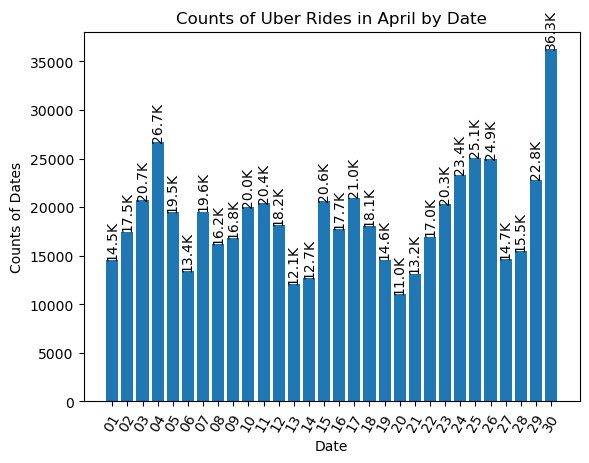

In [30]:
# Create a bar plot of Dates:
plt.bar(date_counts.index,date_counts.values)
plt.xlabel('Date')
plt.xticks(date_counts.index, [i.strftime('%d') for i in date_counts.index], rotation= 60)

plt.ylabel('Counts of Dates')

# Add annotation on y-axis:
for i in range(len(date_counts)):
    plt.text(date_counts.index[i], date_counts.values[i], f"{date_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='bottom')

plt.title('Counts of Uber Rides in April by Date')
plt.show()

# Plot ride volumn by Days in Week

Based on the previous plot, it seems like there might also be a pattern throughout the weeks. 

To confirm this, we can create another plot based on the days of the week. 

Please note that we will need to reindex the x-ticks to display the days of the week from Monday to Sunday.

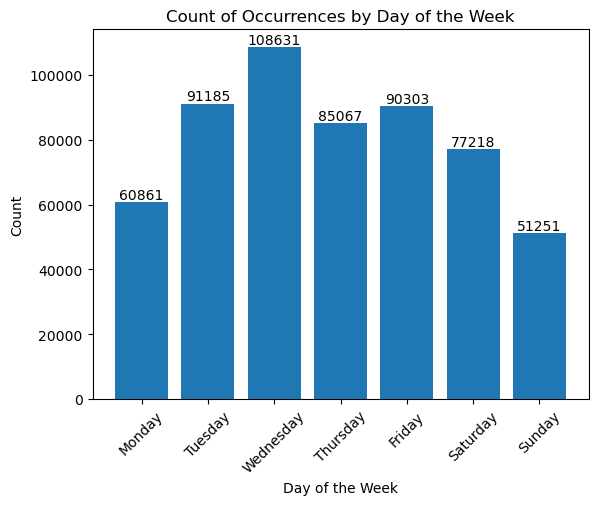

In [13]:
# Sort the counts of Days from Monday to Friday:
days_in_order= ['aMonday', 'aTuesday', 'aWednesday', 'aThursday', 'aFriday', 'aSaturday', 'aSunday']
days_label= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts= day_counts.reindex(days_in_order)

# Make a bar plot:
plt.bar(day_counts.index, day_counts.values)

# Reset the x-axis label:
plt.xlabel('Day of the Week')
plt.xticks(ticks= day_counts.index,labels= days_label,rotation= 45)

plt.ylabel('Count')

# Add annotation on y-axis:
for i in range(len(day_counts)):
    plt.text(day_counts.index[i], day_counts.values[i], str(day_counts.values[i]), ha='center', va='bottom')

plt.title('Count of Occurrences by Day of the Week')
plt.show()

# Plot ride volumn by Hours:

To dive depper into our data, we can also plot the ride occurance by hours of a day

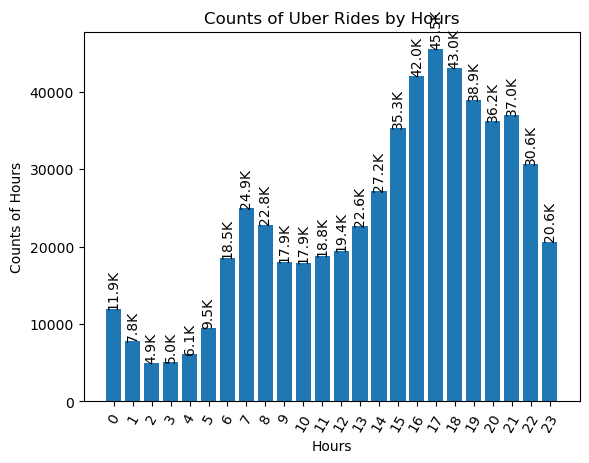

In [31]:
# Create a bar plot for Hours:
plt.bar(hour_counts.index,hour_counts.values)
plt.xlabel('Hours')
plt.xticks(hour_counts.index,rotation= 60)

plt.ylabel('Counts of Hours')

# Add annotation on y-axis:
for i in range(len(hour_counts)):
    plt.text(hour_counts.index[i], hour_counts.values[i], f"{hour_counts.values[i]/1000:.1f}K", rotation= 90, ha='center', va='bottom')

plt.title('Counts of Uber Rides by Hours')
plt.show()

# Observations and Proposals

Based on the plot of count of Uber rides by day of the week in April 2014 in NYC,

it appears that Monday and Sunday have the least counts, while Tuesday and Wednesday have the most rides. 

Additionally, the plot indicates that approximately 60% of rides occurred between 14:00 - 21:00.

**Based on this observation, some possible proposals for the reasons behind this pattern could be:**

**1. Commuting patterns**: Tuesdays and Wednesdays are typically busy weekdays when people commute to work and go about their regular activities. This could explain the higher ride counts on these days. In contrast, Mondays and Sundays may see fewer rides as people may be off work or have more flexible schedules.

**2. Business travel:** Tuesdays and Wednesdays are often popular days for business travel, as professionals may travel to different locations for meetings, conferences, or other work-related events. This could contribute to the higher ride counts on these days compared to Mondays and Sundays.

**3. Weekend leisure activities:** Mondays and Sundays may see fewer rides as people may prefer to stay at home or engage in leisure activities closer to their residences during weekends, resulting in lower ride counts.

# Examing Data from April to September

And create a **line plot** to show pattern!

In [32]:
data_concat['Date/Time'] = pd.to_datetime(data_concat['Date/Time'])

# Add two new columns of Date and Hours:
data_concat['Date'] = data_concat['Date/Time'].dt.date
data_concat['Hour'] = data_concat['Date/Time'].dt.hour
data_concat['Day_of_Week']= data_concat['Date/Time'].dt.strftime('a%A')

# Calculate counts of occurance of Dates and Hours:
date_counts_concat = data_concat['Date'].value_counts().sort_index()
hour_counts_concat = data_concat['Hour'].value_counts().sort_index()

day_counts_concat = data_concat['Day_of_Week'].value_counts()

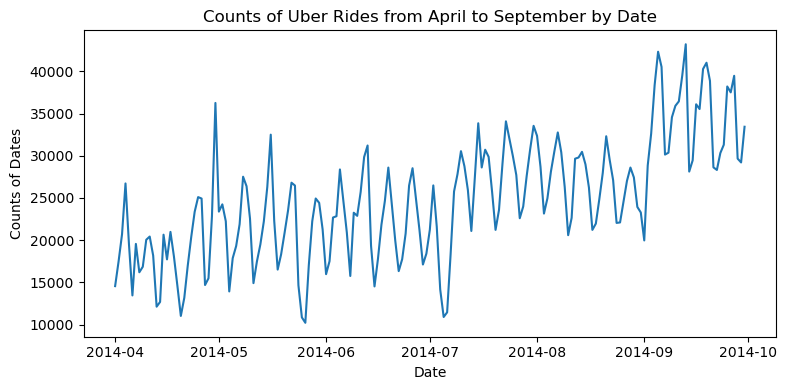

In [46]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

plt.tight_layout()
plt.show()

# Peaks and Pits

By creating a line plot, it appears that Uber ride volumes follow **cyclical patterns**, with **peaks and pits**. 

Let's add **annotations** to highlight these peaks and pits.

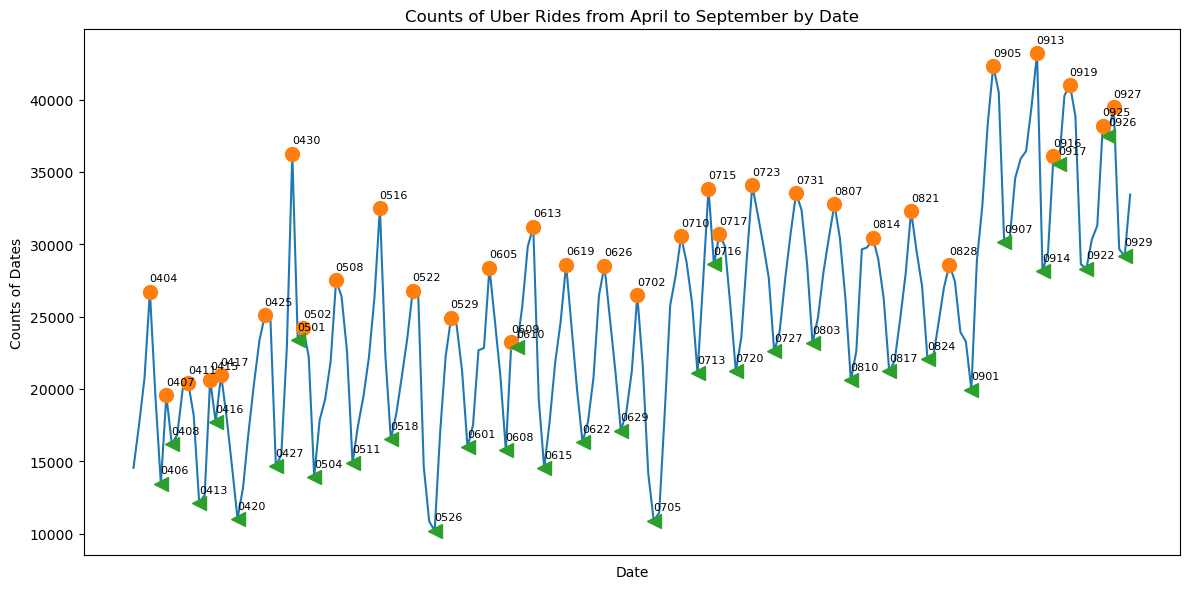

In [58]:
# Create a line plot of Dates:
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(date_counts_concat.index, date_counts_concat.values)
ax.set_xlabel('Date')
ax.set_ylabel('Counts of Dates')
ax.set_title('Counts of Uber Rides from April to September by Date')

# Get the indices of peaks and pits in the data:
from scipy.signal import find_peaks
peaks, _ = find_peaks(date_counts_concat.values)
pits, _ = find_peaks(-date_counts_concat.values)
peaks_and_pits = np.sort(np.concatenate([peaks, pits]))

# Add markers at the peaks and pits:
ax.plot(date_counts_concat.index[peaks], date_counts_concat.values[peaks], 'o', markersize=10, label='Peaks')
ax.plot(date_counts_concat.index[pits], date_counts_concat.values[pits], '<', markersize=10, label='Pits')

# Add annotations with the corresponding dates at the peaks and pits:
for i in range(len(peaks_and_pits)):
    ax.annotate(date_counts_concat.index[peaks_and_pits[i]].strftime('%m%d'),
                xy=(date_counts_concat.index[peaks_and_pits[i]], date_counts_concat.values[peaks_and_pits[i]]),
                xytext=(10,6),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=8)
    
ax.set_xticks([])
plt.tight_layout() 

plt.show()

In [59]:
peaks_and_pits

array([  3,   5,   6,   7,  10,  12,  14,  15,  16,  19,  24,  26,  29,
        30,  31,  33,  37,  40,  45,  47,  51,  55,  58,  61,  65,  68,
        69,  70,  73,  75,  79,  82,  86,  89,  92,  95, 100, 103, 105,
       106, 107, 110, 113, 117, 121, 124, 128, 131, 135, 138, 142, 145,
       149, 153, 157, 159, 165, 166, 168, 169, 171, 174, 177, 178, 179,
       181])

In [72]:
peaks

array([  3,   6,  10,  14,  16,  24,  29,  31,  37,  45,  51,  58,  65,
        69,  73,  79,  86,  92, 100, 105, 107, 113, 121, 128, 135, 142,
       149, 157, 165, 168, 171, 177, 179])

In [73]:
peak_days_of_week= []

for i in peaks:
    peak_date= date_counts_concat.index[i]
    peak_day_of_week= peak_date.strftime('%A')
    peak_days_of_week.append(peak_day_of_week)

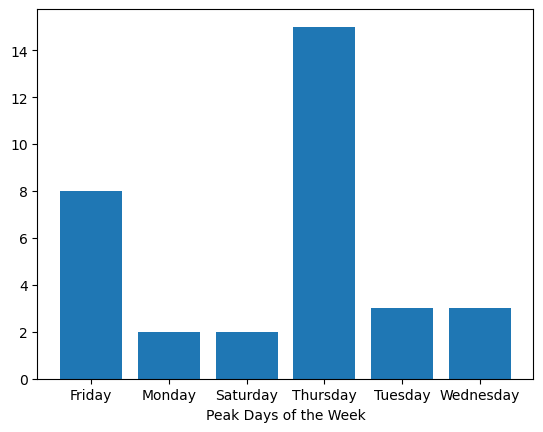

In [74]:
peak_days, counts= np.unique(peak_days_of_week, return_counts= True)
plt.bar(peak_days, counts)
plt.xlabel('Peak Days of the Week')



plt.show()